In [1]:
from pandas.core.common import SettingWithCopyWarning
import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import t, norm
from matplotlib.patches import Polygon
warnings.filterwarnings(action='ignore',category=FutureWarning)
warnings.filterwarnings(action='ignore',category=SettingWithCopyWarning)

# Problem 1

In [92]:
problem1 = pd.read_csv('problem1.csv')

In [93]:
mu, sigma = norm.fit(problem1['x'])
df, mu_t, sigma_t = t.fit(problem1['x'], method='mle')

In [101]:
var_norm = -norm.ppf(0.05, loc=mu, scale=sigma)
var_t = -t.ppf(0.05,df=df, loc=mu_t, scale=sigma_t)
print(f" VaR:\n Normal Distribution: {round(var_norm,4)}, T distribution: {round(var_t,4)}")

 VaR:
 Normal Distribution: 0.0813, T distribution: 0.0765


In [102]:

sim = norm.rvs(loc=mu,scale=sigma,size=2000)
es = -np.mean(sim[np.where(sim<np.quantile(sim, 0.05))])
sim_t = t.rvs(df=df, loc=mu_t,scale=sigma_t,size=2000)
es_t = -np.mean(sim_t[np.where(sim_t<np.quantile(sim_t, 0.05))])
print(f" Expected shortfall:\n Normal Distribution: {round(es,4)}, T distribution: {round(es_t,4)}")

 Expected shortfall:
 Normal Distribution: 0.1079, T distribution: 0.1178


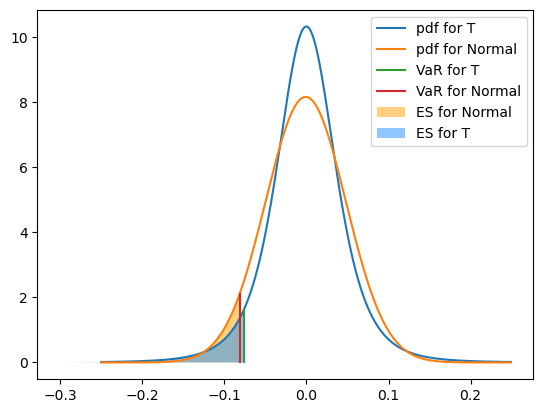

In [103]:
x = np.linspace(-0.25,0.25,500,endpoint=False)
Ixnorm = np.linspace(-0.3,-var_norm)
Ix_t = np.linspace(-0.3,-var_t)
Iynorm = norm.pdf(Ixnorm,loc=mu, scale=sigma)
Iyt = t.pdf(Ix_t,df,loc=mu_t, scale=sigma_t)

poly_t = Polygon(list(zip(Ix_t,Iyt))+[(-var_t,0)], facecolor='dodgerblue',alpha=0.5,label="ES for T")
poly_norm = Polygon(list(zip(Ixnorm,Iynorm))+[(-var_norm,0)], facecolor='orange',alpha=0.5,label="ES for Normal")

fig,ax = plt.subplots()

plt.plot(x,t.pdf(x,loc=mu_t, scale=sigma_t, df=df), label="pdf for T")
plt.plot(x,norm.pdf(x,loc=mu, scale=sigma), label="pdf for Normal")
plt.plot(np.ones(20)*(-var_t), np.linspace(0,t.pdf(-var_t,df,loc=mu_t, scale=sigma_t),20), label="VaR for T")
plt.plot(np.ones(20)*(-var_norm), np.linspace(0,norm.pdf(-var_norm,loc=mu, scale=sigma),20), label = "VaR for Normal")
ax.add_patch(poly_norm)
ax.add_patch(poly_t)
plt.legend()
plt.savefig('problem1.png')

# Problem 3

In [8]:
from Library.risk_stats import return_calculate


In [116]:
prices = pd.read_csv("DailyPrices.csv")
returns = return_calculate(prices)

In [117]:
returns

,Date,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,2/15/2022 0:00,0.016127,0.023152,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028572,0.013237
1,2/16/2022 0:00,0.001121,-0.001389,-0.001167,0.010159,0.001041,0.008268,0.007784,-0.020181,0.000604,...,0.006757,-0.002429,0.005763,0.038879,0.009294,0.012244,0.003363,0.015301,-0.001389,-0.025984
2,2/17/2022 0:00,-0.021361,-0.021269,-0.029282,-0.021809,-0.050943,-0.037746,-0.037669,-0.040778,-0.075591,...,-0.034949,0.005326,0.015017,-0.046988,-0.009855,0.004833,-0.030857,-0.031925,-0.033380,-0.028763
3,2/18/2022 0:00,-0.006475,-0.009356,-0.009631,-0.013262,-0.022103,-0.016116,-0.013914,-0.007462,-0.035296,...,-0.000646,-0.000908,0.007203,-0.000436,-0.003916,-0.005942,-0.013674,-0.004506,-0.003677,0.015038
4,2/22/2022 0:00,-0.010732,-0.017812,-0.000729,-0.015753,-0.041366,-0.004521,-0.008163,-0.019790,-0.010659,...,0.009494,0.007121,-0.008891,0.003243,-0.001147,-0.000673,0.008342,-0.037654,-0.002246,-0.013605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2/3/2023 0:00,-0.010629,0.024400,-0.023621,-0.084315,0.009083,-0.027474,-0.032904,-0.011866,-0.028053,...,-0.004694,-0.011251,-0.001277,-0.002677,0.038211,0.004134,0.002336,-0.008916,-0.005954,0.001617
244,2/6/2023 0:00,-0.006111,-0.017929,-0.006116,-0.011703,0.025161,-0.017942,-0.016632,-0.002520,-0.000521,...,-0.014451,0.003945,0.001066,-0.007102,0.022012,0.021826,-0.041181,0.005106,-0.009782,-0.004595
245,2/7/2023 0:00,0.013079,0.019245,0.042022,-0.000685,0.010526,0.046064,0.044167,0.029883,0.051401,...,-0.000368,-0.016473,-0.008518,0.019544,-0.003590,-0.001641,0.003573,0.001451,0.008669,-0.003618
246,2/8/2023 0:00,-0.010935,-0.017653,-0.003102,-0.020174,0.022763,-0.076830,-0.074417,-0.042741,0.001443,...,-0.008469,-0.004456,-0.001289,-0.018009,-0.004416,0.002819,-0.015526,0.004106,-0.015391,0.009363


In [2]:
from Library.risk_stats import var_calculate,es_calculate,return_calculate
def cal_port(portfolio, prices, dateColumn="Date"):
    stocks = portfolio.loc[:,'Stock'].values
    prices_new = prices.loc[:,stocks]
    portfolio.loc[:,'price'] = [prices_new.loc[len(prices_new)-1, stock] for stock in stocks]
    value = (portfolio.Holding * portfolio.price).sum()
    prices_new.loc[:,dateColumn] = prices.loc[:,dateColumn].values
    return value, prices_new,portfolio


In [123]:
from Library.variance import spear_cor
def copula_sim(df, method="T", simN=500):
    df = np.transpose(df)
    Z = []
    n = len(df)
    simX = []
    params = []
    if method.upper() =='T':

        for r in df:
            df, mu_t, sigma_t = t.fit(r, method='mle')
            u = t.cdf(r, df, mu_t,sigma_t)
            params.append([df, mu_t, sigma_t])
            Z.append(norm.ppf(u))
        Z = np.array(Z)
        cor = spear_cor(Z)
        sim = np.random.multivariate_normal(mean= np.zeros(n), cov=cor,size=simN)
        sim = sim.T
        for i in range(0,n):
            u = norm.cdf(sim[i])
            param = params[i]
            x = t.ppf(u,df=param[0],loc=param[1],scale=param[2])
            simX.append(x)


    elif method.upper() == "NORMAL":
        for r in df:

            mu = np.mean(r)
            sigma = np.std(r)
            params.append([mu,sigma])
            u = norm.cdf(r,loc=mu,scale=sigma)

            Z.append(norm.ppf(u))
        Z = np.array(Z)

        cor = spear_cor(Z)
        sim = np.random.multivariate_normal(mean= np.zeros(n), cov=cor,size=simN)
        sim = sim.T
        for i in range(0,n):
            u = norm.cdf(sim[i])
            param = params[i]
            x = norm.ppf(u,loc=param[0],scale=param[1])
            simX.append(x)
    return np.array(simX),cor

def cal_port_var(port,price, dis="T", simN=1000):
    value, prices, port = cal_port(port, price)
    return_dis = np.array(return_calculate(prices).drop('Date',axis=1))
    cov = np.cov(return_dis.T)
    n = len(port)
    sim,cor = copula_sim(df=return_dis,method=dis,simN=1000)
    holding = port.loc[:,'Holding']
    pr = port.loc[:,'price']
    hp = holding*pr

    sim = sim * hp.values.reshape(-1,1)
    var = np.sum(np.quantile(sim, 0.05,axis=1))
    sims = np.sum(sim, axis=0)

    es_port = np.mean(sims[np.where(sims<var)])


    return -var, -es_port,cor


In [64]:
portfolio = pd.read_csv('portfolio.csv')
price = pd.read_csv('DailyPrices.csv')
#var_total, es_total = cal_port_var(portfolio, price)

In [98]:

portA = portfolio.loc[portfolio.Portfolio == 'A']
sim = cal_port_var(portA,price)
sim


(35, 1000)
(1000,)


(10344.644886597096, 12249.212228888748)

In [20]:
import numpy as np
from scipy import stats
res = stats.spearmanr([1, 2, 3, 4, 5], [5, 6, 7, 8, 7])
res.correlation

0.8207826816681233

In [124]:
portfolioA = portfolio.loc[portfolio.Portfolio=='A',:]
var_a, es_a,cor_a = cal_port_var(portfolioA, price)

In [125]:
portfolioB = portfolio.loc[portfolio.Portfolio=='B',:]
var_b, es_b,cor_b = cal_port_var(portfolioB, price)

In [126]:
portfolioC = portfolio.loc[portfolio.Portfolio=='C',:]
var_c, es_c, cor_c = cal_port_var(portfolioC, price)

In [127]:

var_total, es_total,cor_total = cal_port_var(portfolio, price)

In [128]:
print(f'& {round(var_a,4)} & {round(es_a,4)} \\\\')
print(f'& {round(var_b,4)} & {round(es_b,4)} \\\\')
print(f'& {round(var_c,4)} & {round(es_c,4)} \\\\')
print(f'& {round(var_total,4)} & {round(es_total,4)} \\\\')

& 10969.0565 & 13275.8058 \\
& 9327.7704 & 11374.2444 \\
& 8153.3069 & 10234.0386 \\
& 27285.6262 & 31688.7645 \\


In [129]:
cor_a

array([[1.        , 0.67991648, 0.56605657, ..., 0.76859665, 0.59908958,
        0.50488961],
       [0.67991648, 1.        , 0.40689125, ..., 0.60400122, 0.38218277,
        0.4548889 ],
       [0.56605657, 0.40689125, 1.        , ..., 0.61310857, 0.57446922,
        0.5783345 ],
       ...,
       [0.76859665, 0.60400122, 0.61310857, ..., 1.        , 0.63108487,
        0.50463471],
       [0.59908958, 0.38218277, 0.57446922, ..., 0.63108487, 1.        ,
        0.50060107],
       [0.50488961, 0.4548889 , 0.5783345 , ..., 0.50463471, 0.50060107,
        1.        ]])

In [130]:
cor_b

array([[1.        , 0.84720258, 0.78626692, ..., 0.48007021, 0.3927692 ,
        0.65338119],
       [0.84720258, 1.        , 0.75895747, ..., 0.42496668, 0.32379144,
        0.62872858],
       [0.78626692, 0.75895747, 1.        , ..., 0.35639725, 0.28092965,
        0.67715737],
       ...,
       [0.48007021, 0.42496668, 0.35639725, ..., 1.        , 0.54829505,
        0.47011397],
       [0.3927692 , 0.32379144, 0.28092965, ..., 0.54829505, 1.        ,
        0.37490854],
       [0.65338119, 0.62872858, 0.67715737, ..., 0.47011397, 0.37490854,
        1.        ]])

In [133]:
cor_total

array([[1.        , 0.67991648, 0.56605657, ..., 0.26310491, 0.25696071,
        0.55301483],
       [0.67991648, 1.        , 0.40689125, ..., 0.08462507, 0.15394135,
        0.40094039],
       [0.56605657, 0.40689125, 1.        , ..., 0.37695403, 0.22534149,
        0.74788931],
       ...,
       [0.26310491, 0.08462507, 0.37695403, ..., 1.        , 0.3333058 ,
        0.35037312],
       [0.25696071, 0.15394135, 0.22534149, ..., 0.3333058 , 1.        ,
        0.14562982],
       [0.55301483, 0.40094039, 0.74788931, ..., 0.35037312, 0.14562982,
        1.        ]])